In [1]:
import pandas as pd 
import glob 
import multiprocessing 
import gensim.models.word2vec as w2v
import sklearn 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re 
import nltk 
import os 
import codecs
import glob
import logging
import multiprocessing
import pprint
from nltk.tokenize import sent_tokenize
import string


C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


a


In [2]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUSµ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUSµ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#preparing all articles 
data = pd.read_csv('allData.csv')
all_articles=''
for article in data['article']:
    all_articles=all_articles+str(article)

    

In [5]:
def clean_text(text):

    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('french'))
    words = [w for w in words if not w in stop_words]
    return words

In [6]:
from nltk.tokenize import sent_tokenize
raw_sentences = sent_tokenize(all_articles)
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(clean_text(raw_sentence))


In [7]:

#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [8]:

model = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [9]:
model.build_vocab(sentences)


In [10]:
print("Word2Vec new vocabulary length:", len(model.wv.vocab))


Word2Vec new vocabulary length: 12385


In [11]:
from gensim.models import word2vec
print(word2vec.FAST_VERSION) 
model.train(sentences,total_examples=model.corpus_count,epochs=model.epochs)


1


(1243380, 1299315)

In [12]:
if not os.path.exists("trained"):
    os.makedirs("trained")
model.save(os.path.join("trained", "model.w2v"))


C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [13]:
model = w2v.Word2Vec.load(os.path.join("trained", "model.w2v"))


C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [14]:
model = w2v.Word2Vec.load(os.path.join("trained", "model.w2v"))


C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [20]:
import sklearn
from sklearn import manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.syn0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [22]:
all_word_vectors_matrix

array([[ 0.0879028 , -0.14243376, -0.3679169 , ...,  0.13272436,
        -0.3263715 , -0.36424425],
       [ 0.00230006, -0.29152867, -0.44297615, ...,  0.4277771 ,
         0.07923153,  0.33218065],
       [-0.17949946, -0.2667366 , -0.12752776, ...,  0.12830582,
        -0.18917441, -0.16379087],
       ...,
       [ 0.05188342, -0.02255234, -0.04952202, ..., -0.00864877,
        -0.05441919,  0.11290177],
       [ 0.01368299, -0.0338885 , -0.03645328, ...,  0.0270616 ,
        -0.06322365,  0.06595505],
       [ 0.01046555, -0.02574438, -0.04596328, ...,  0.01080665,
        -0.05750612,  0.1208593 ]], dtype=float32)

In [23]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [35]:
model.wv.most_similar('nidaa')

[('tounes', 0.81951904296875),
 ('clan', 0.7529454827308655),
 ('soufiene', 0.7481507062911987),
 ('hammamet', 0.7384811639785767),
 ('équivoque', 0.7372144460678101),
 ('monastir', 0.7328289747238159),
 ('almoubâdra', 0.731157124042511),
 ('administratif', 0.7270170450210571),
 ('abdelhamid', 0.7269718050956726),
 ('dérivés', 0.7243660688400269)]

In [39]:
model.wv.most_similar('ennahdha')

[('particularisé', 0.7165892720222473),
 ('lotif', 0.7072968482971191),
 ('cherchait', 0.7003951072692871),
 ('fidèle', 0.6967347860336304),
 ('islamiste', 0.6877189874649048),
 ('mouvement', 0.6816648244857788),
 ('zitoun', 0.6741584539413452),
 ('exchef', 0.6723551750183105),
 ('dilou', 0.671615481376648),
 ('rached', 0.6657971143722534)]

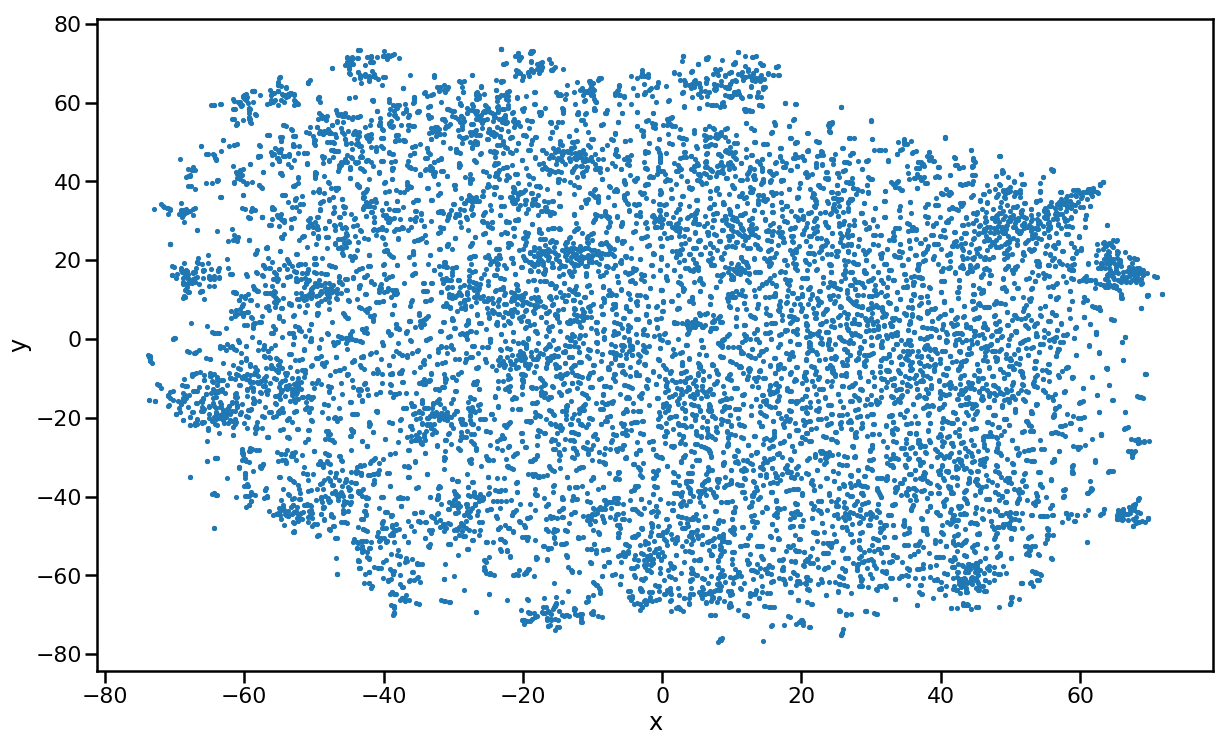

In [40]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))


In [41]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

'fm'

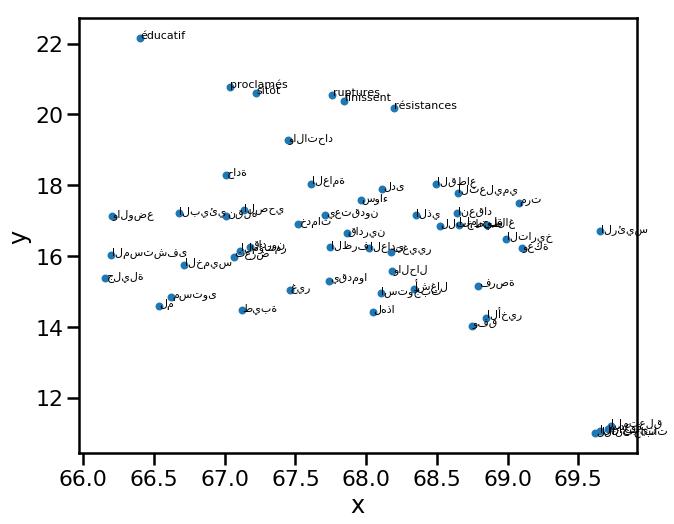

In [57]:
plot_region(x_bounds=(66, 70), y_bounds=(10, 30))
